## Model Evaluation 
##### A quantitative analysis

### Purpose
This notebook evaluates the clustering model using:
- Cluster analysis metrics (e.g., Silhouette score, Davies-Bouldin index)
- Visualizations of cluster centers and preferences
- Insights into the clustering effectiveness


C:\Users\User\anaconda3\envs\deep_learning\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


Silhouette Score: 0.5326122467869884


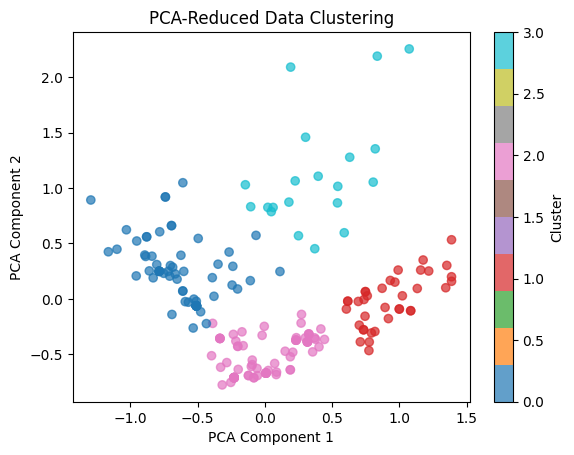

In [1]:
import joblib
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define evaluation function
def evaluate_model(kmeans_path, mlb_path, pca_path, dataset_path):
    # Load the saved models
    kmeans = joblib.load(kmeans_path)
    mlb = joblib.load(mlb_path)
    pca_model = joblib.load(pca_path)

    # Load the dataset
    color_data = pd.read_csv(dataset_path)

    # Preprocess the 'Favorite_Colors' column
    color_data['Favorite_Colors'] = color_data['Favorite_Colors'].str.split(', ')

    # Transform the 'Favorite_Colors' column using the loaded MultiLabelBinarizer
    favorite_colors_encoded = mlb.transform(color_data['Favorite_Colors'])

    # Apply PCA transformation
    reduced_data = pca_model.transform(favorite_colors_encoded)

    # Predict cluster labels
    predicted_labels = kmeans.predict(reduced_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(reduced_data, predicted_labels)
    print(f"Silhouette Score: {silhouette_avg}")

    # Perform PCA for visualization
    pca = PCA(n_components=2)
    reduced_data_2d = pca.fit_transform(favorite_colors_encoded)

    # Re-cluster for visualization purposes
    kmeans = joblib.load(kmeans_path)  # Reload to ensure consistency
    reduced_labels = kmeans.fit_predict(reduced_data_2d)

    # Calculate silhouette score on reduced data
    silhouette_avg_reduced = silhouette_score(reduced_data_2d, reduced_labels)
    #print(f"Silhouette Score on Reduced Data: {silhouette_avg_reduced}")

    # Plot PCA-reduced data with clusters
    plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=reduced_labels, cmap='tab10', alpha=0.7)
    plt.title("PCA-Reduced Data Clustering")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()

# File paths
kmeans_path = 'kmeans_color_model_v10.pkl'
mlb_path = 'mlb_encoder_v10.pkl'
pca_path = 'pca_model_v10.pkl'
dataset_path = "C:\\Users\\User\\Downloads\\Color_Preferences_Survey_Data_v4.csv"

# Call the evaluation function
evaluate_model(kmeans_path, mlb_path, pca_path, dataset_path)
